In [1]:
#Import of all the importnat libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%mathplotlib inline

UsageError: Line magic function `%mathplotlib` not found.


In [47]:
#Loading Data Confirmed Cases
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed.csv')
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [50]:
#Loading Data Confimred Deaths
deaths_reported = pd.read_csv('time_series_covid_19_deaths.csv')
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,1,1,1,2,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,2,2,4,5,5,6,8
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7,9,11,15,17,17,19,21,25,26
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,3,3
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Loading Data Recovered
recovered_cases = pd.read_csv('time_series_covid_19_recovered.csv')
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,2,2,2,10,17,17,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,12,32,32,32,65,65,24,65,29,29
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Extrating all the colums using the keys() funktion
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20'],
      dtype='object')

In [53]:
#Extract only colums with confirmed deaths and confirmed cases
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]

In [54]:
death = deaths_reported.loc[:,cols[4]:cols[-1]]

In [55]:
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [56]:
#Check of the head of the outbreak cases
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,0,0,0,0,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,0,0,0,0,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,0,0,0,0,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,0,0,0,0,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


In [57]:
#Finding the total confirmed cases, death cases and the recovered cases and append them to an 4 emty lists
#Also, calculate the total moratalty rate which is the deatgh_sum/confirmed cases)

dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = death[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


In [58]:
#Dispaly each of the new variabels
confirmed_sum, death_sum, recovered_sum,

(593291, 27198, 130915)

In [59]:
#world_cases

In [60]:
#Active Cases
Ongoing = confirmed_sum - death_sum - recovered_sum
#Ongoing

In [61]:
#Converting into a numpy array
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [62]:
#days_since_1_22

In [63]:
#world_cases

In [64]:
#total_deaths

In [65]:
#total_recovered

In [66]:
#Forecastinf for the next 10 days
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

In [67]:
#future_forecast

In [68]:
#Convert all integers into datetime for better visu
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date+date.timedelta(days=i)).strftime('%m/%d%Y'))

In [69]:
#Visual of the latest data from march 27th
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [70]:
#latest_confirmed, latest_deaths, latest_recoveries

In [71]:
#Find the list of unique countries
unique_countries = list(confirmed_cases['Country/Region'].unique())
#unique_countries

In [72]:
#The next line of code will baisiclly claculate the total number of confirmedcases by each country 
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=0)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()
    

In [83]:
#Number of cases per country/Region
print('Confirmed Cases by Countries/Regions')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]};{country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions
Papua New Guinea;1 cases
Saint Vincent and the Grenadines;1 cases
Timor-Leste;1 cases
Libya;1 cases
Nicaragua;2 cases
Belize;2 cases
Guinea-Bissau;2 cases
Saint Kitts and Nevis;2 cases
Bhutan;3 cases
Central African Republic;3 cases
Chad;3 cases
Gambia;3 cases
Liberia;3 cases
Mauritania;3 cases
Saint Lucia;3 cases
Somalia;3 cases
Sudan;3 cases
Angola;4 cases
Congo (Brazzaville);4 cases
Holy See;4 cases
Nepal;4 cases
Cabo Verde;5 cases
Fiji;5 cases
Guyana;5 cases
Zimbabwe;5 cases
Syria;5 cases
Benin;6 cases
Eritrea;6 cases
Laos;6 cases
Antigua and Barbuda;7 cases
Gabon;7 cases
Seychelles;7 cases
Grenada;7 cases
Mozambique;7 cases
Guinea;8 cases
Haiti;8 cases
Namibia;8 cases
Suriname;8 cases
Burma;8 cases
Eswatini;9 cases
Bahamas;10 cases
Niger;10 cases
Mongolia;11 cases
Dominica;11 cases
Mali;11 cases
Djibouti;12 cases
Equatorial Guinea;12 cases
El Salvador;13 cases
Tanzania;13 cases
Ethiopia;16 cases
Maldives;16 cases
Zambia;22 cases
Uganda;23 cases

In [84]:
#Find the List of unique provinces

unique_provinces = list(confirmed_cases['Province/State'].unique())
#those are countries, which are not provinces or states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

ValueError: list.remove(x): x not in list

In [85]:
#Finding the numbers of confirmed cases by province, state or city
province_confirmed_cases = []
no_cases = []
for in in range unique_provinces:
    cases = latest_confrimed[confrimed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
        else:
            no_cases.append(i)
            
for i in no_cases
    unique_province.remove(i)

SyntaxError: invalid syntax (<ipython-input-85-0578d7d5e3ee>, line 4)

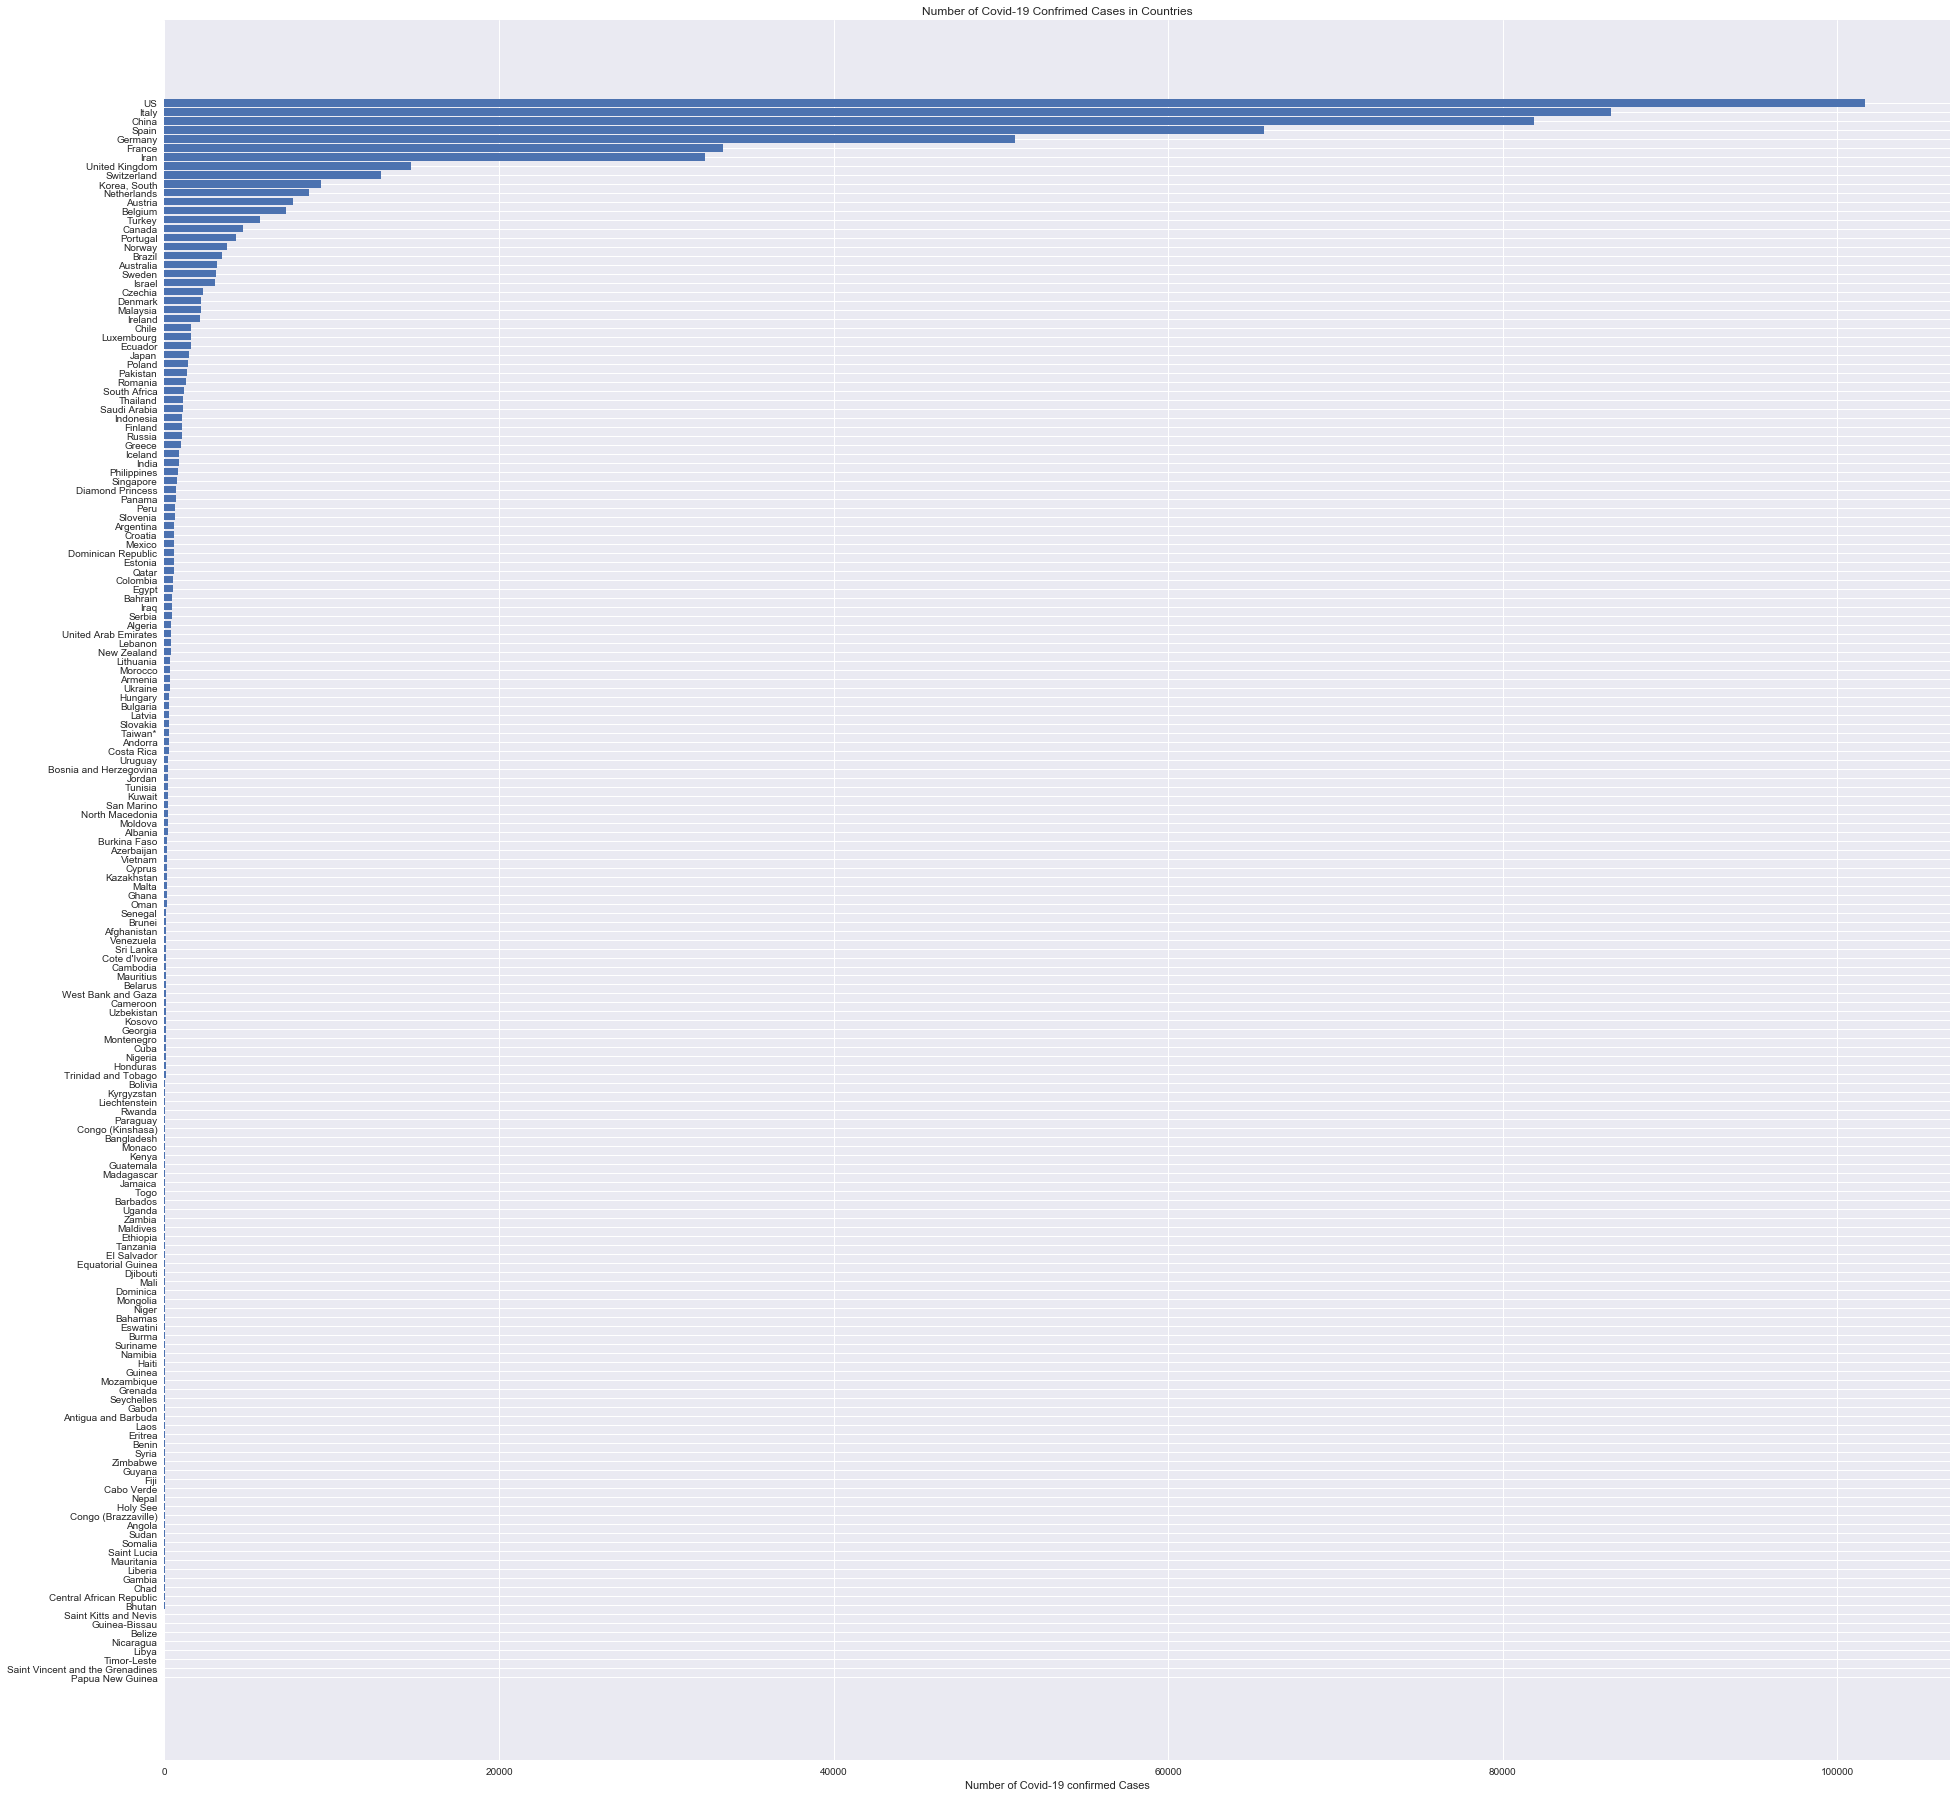

In [88]:
#Plot a bar to see the total confirmed cases across different countries
plt.figure(figsize=(32,32))
plt.barh(unique_countries, country_confirmed_cases)
plt.title('Number of Covid-19 Confrimed Cases in Countries')
plt.xlabel('Number of Covid-19 confirmed Cases')
plt.show()

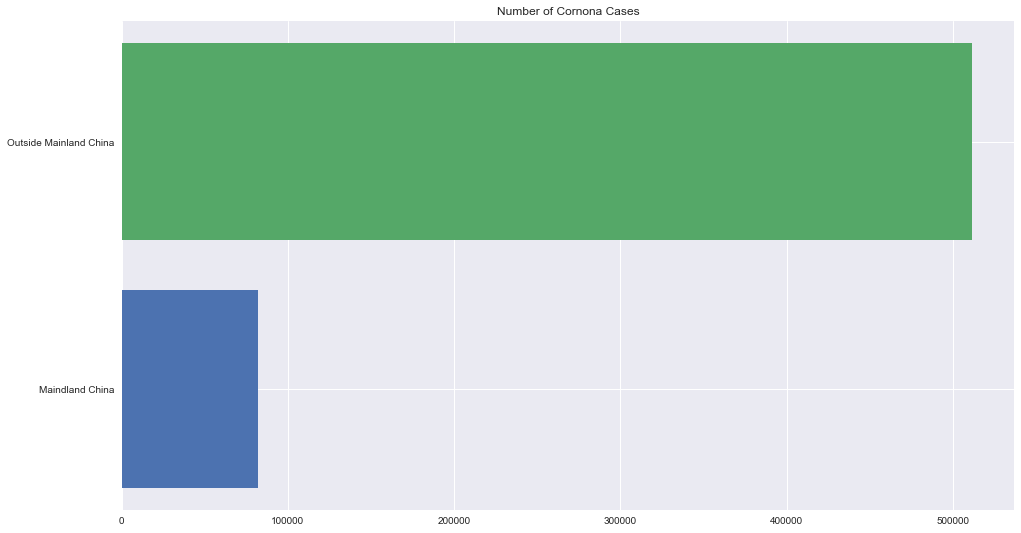

In [94]:
#Plota br graph to see the total confirmed cases between china and outsine china
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
outside_mainland_china = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Maindland China',china_confirmed)
plt.barh('Outside Mainland China',outside_mainland_china)
plt.title('Number of Cornona Cases')
plt.show()